## Libraries Imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\91859\OneDrive\Desktop\Python ML Internship\Pancreatic Cancer.csv")

## Data Preprocessing


In [3]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

<Axes: xlabel='diagnosis'>

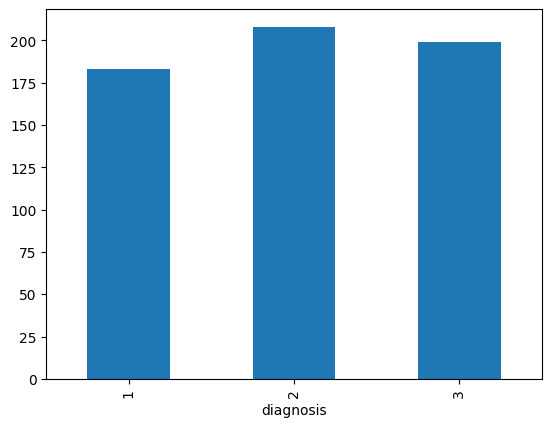

In [4]:
(df.groupby('diagnosis')
   ['sample_id'].nunique()
   .plot.bar()
)

In [5]:
df=df.drop("sample_id",axis=1)

In [6]:
df["patient_cohort"].unique()

array(['Cohort1', 'Cohort2'], dtype=object)

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['patient_cohort']= label_encoder.fit_transform(df['patient_cohort'])

In [8]:
df['patient_cohort']=df['patient_cohort'].astype(int)

In [9]:
df['sample_origin'].unique()

array(['BPTB', 'LIV', 'ESP', 'UCL'], dtype=object)

In [10]:
df['sample_origin']= label_encoder.fit_transform(df['sample_origin'])
df['sample_origin']=df['sample_origin'].astype(int)

In [11]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex']=df['sex'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    int32  
 1   sample_origin            590 non-null    int32  
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    int32  
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int32(3), int64(2), object(2)
memory usage: 53.1+ KB


In [13]:
df['diagnosis'].unique()

array([1, 2, 3], dtype=int64)

In [14]:
df['stage']=df['stage'].fillna('0')

In [15]:
df['stage'].unique()

array(['0', 'I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV'],
      dtype=object)

In [16]:
df['stage']= label_encoder.fit_transform(df['stage'])
df['stage']=df['stage'].astype(int)

In [17]:
df['benign_sample_diagnosis'].unique()

array([nan, 'Abdominal Pain ', 'Biliary Stricture (Secondary to Stent) ',
       'Cholecystitis', 'Cholecystitis ', 'Cholecystitis (Chronic) ',
       'Cholecystitis (Chronic) Cholelithiasis',
       'Cholecystitis (Chronic) Cholesterolsis', 'Choledochal Cyst ',
       'Choledocholiathiasis', 'Choledocholiathiasis ',
       'Cholelithiasis with adenomyomatous hyperplasia ',
       'Duodenal Stricture', 'Duodenitis', 'Gallbladder polyps ',
       'Gallbladder Porcelain', 'Gallstones', 'Gallstones ',
       'Gallstones - Incidental ', 'Gastritis ', 'Gastritis and Reflux ',
       'Ill defined lesion in uncinate process',
       'Ischaemic Common Bile Duct Stricture',
       'Pancreatitis (Pseudocyst)', 'Pancreatitis', 'Pancreatitis ',
       'Pancreatitis (Abscess)', 'Pancreatitis (Acute)',
       'Pancreatitis (Alcohol-Chronic-Pseuodcyst)',
       'Pancreatitis (Alcohol-Chronic)', 'Pancreatitis (Alcohol)',
       'Pancreatitis (Autoimmune) ', 'Pancreatitis (Chronic-Pseudocyst) ',
      

In [18]:
df['benign_sample_diagnosis']=df['benign_sample_diagnosis'].fillna("null")

In [19]:
df.isnull().sum()

patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [20]:
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())

In [21]:
df['REG1A']=df['REG1A'].fillna(df['REG1A'].mean())

In [22]:
df=df.drop("benign_sample_diagnosis",axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  590 non-null    int32  
 1   sample_origin   590 non-null    int32  
 2   age             590 non-null    int64  
 3   sex             590 non-null    int32  
 4   diagnosis       590 non-null    int64  
 5   stage           590 non-null    int32  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int32(4), int64(2)
memory usage: 46.2 KB


In [24]:
X=df.drop("diagnosis",axis=1)
y=df['diagnosis']

Empty DataFrame
Columns: [feature1, feature2, Correlation]
Index: []


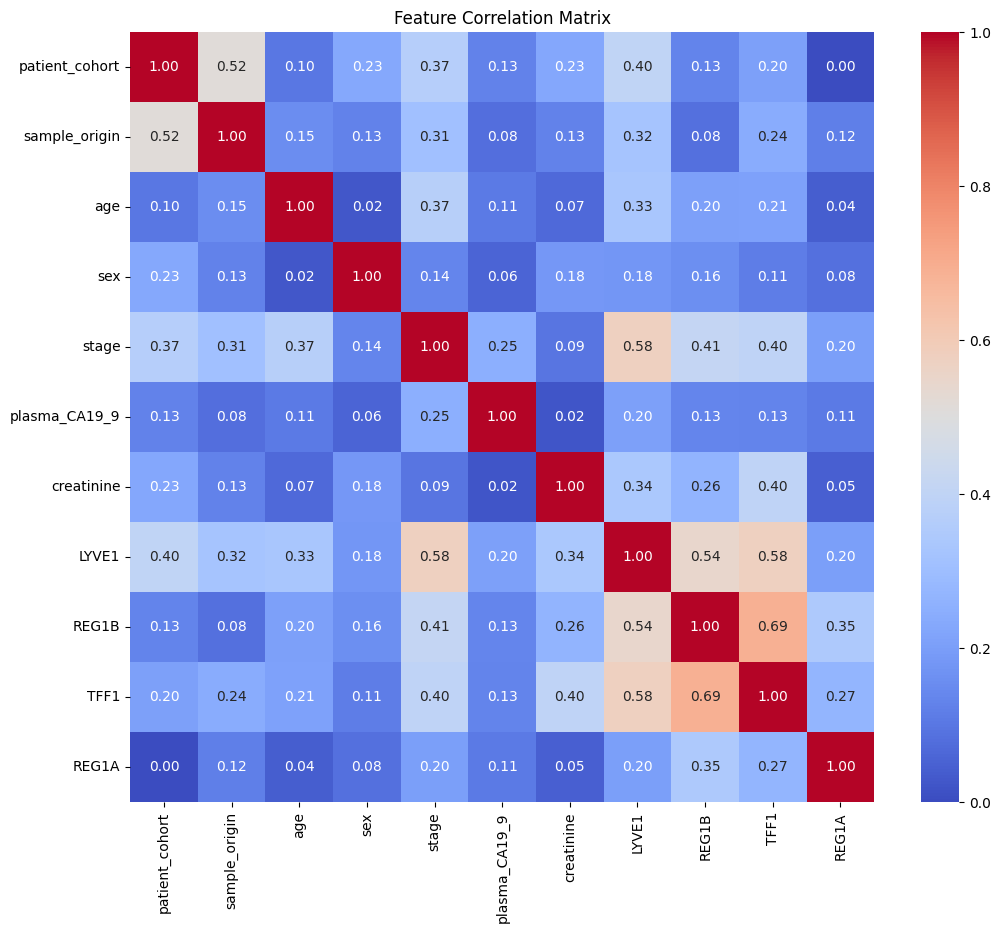

In [25]:
#correlation matrix
corr_matrix = X.corr()
corr_matrix = X.corr().abs()
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

# Filter out the pairs that have a correlation lower than the new threshold 0.75
strong_corr_pairs = corr_pairs[corr_pairs >= 0.75]
strong_corr_df = pd.DataFrame(strong_corr_pairs).reset_index()
strong_corr_df.columns = ['feature1', 'feature2', 'Correlation']

# Show the top correlated pairs
print(strong_corr_df.head())

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [26]:
 # Encode categorical labels into numeric values
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)

In [27]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply scaling to the entire dataset
X_scaled = min_max_scaler.fit_transform(X)
X_standardized = standard_scaler.fit_transform(X_scaled)

# Convert scaled data back to a DataFrame 
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

In [28]:
# Print the first few rows before and after standardization
print("\nOriginal Dataset (First 5 Rows):")
print(X.head())

print("\nStandardized Dataset (First 5 Rows):")
print(X_standardized_df.head())


Original Dataset (First 5 Rows):
   patient_cohort  sample_origin  age  sex  stage  plasma_CA19_9  creatinine  \
0               0              0   33    0      0      11.700000     1.83222   
1               0              0   81    0      0     654.002944     0.97266   
2               1              0   51    1      0       7.000000     0.78039   
3               1              0   61    1      0       8.000000     0.70122   
4               1              0   62    1      0       9.000000     0.21489   

      LYVE1      REG1B        TFF1        REG1A  
0  0.893219   52.94884  654.282174  1262.000000  
1  2.037585   94.46703  209.488250   228.407000  
2  0.145589  102.36600  461.141000   735.281222  
3  0.002805   60.57900  142.950000   735.281222  
4  0.000860   65.54000   41.088000   735.281222  

Standardized Dataset (First 5 Rows):
   patient_cohort  sample_origin       age       sex     stage  plasma_CA19_9  \
0       -0.881538      -0.633781 -1.991056 -0.986531 -0.688601  -3

In [29]:
#Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_standardized_df, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 354
Validation set size: 118
Test set size: 118


## Model Training 

In [30]:
# Define individual models
models = [
    ('LightGBM', lgb.LGBMClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, max_depth=6)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]

# Initialize Voting Classifier
voting_clf = VotingClassifier(estimators=models, voting='hard')  # Use 'hard' for hard voting

In [31]:
# Calculate and print metrics for each model
model_metrics = {}
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calculate accuracy, precision, recall, F1-Score
    accuracy = accuracy_score(y_val, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')
    
    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    
    # Calculate and print % of correctly and incorrectly classified instances
    total_instances = np.sum(cm)
    correctly_classified = np.diag(cm).sum()
    incorrectly_classified = total_instances - correctly_classified
    correctly_classified_pct = (correctly_classified / total_instances) * 100
    incorrectly_classified_pct = (incorrectly_classified / total_instances) * 100
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Calculate Relative Absolute Error (RAE)
    mean_y_val = np.mean(y_val)
    rae = np.sum(np.abs(y_pred - y_val)) / np.sum(np.abs(y_val - mean_y_val)) * 100
    
    # Calculate Root Relative Squared Error (RRSE)
    rrse = np.sqrt(np.sum((y_pred - y_val) ** 2) / np.sum((y_val - mean_y_val) ** 2)) * 100
    
    # Store metrics
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Confusion Matrix': cm,
        '% Correctly Classified': correctly_classified_pct,
        '% Incorrectly Classified': incorrectly_classified_pct,
        'RMSE': rmse,
        'RAE': rae,
        'RRSE': rrse
    }

# Train and evaluate Voting Classifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_val)

# Calculate accuracy, precision, recall, F1-Score
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Calculate and print % of correctly and incorrectly classified instances
total_instances = np.sum(cm)
correctly_classified = np.diag(cm).sum()
incorrectly_classified = total_instances - correctly_classified
correctly_classified_pct = (correctly_classified / total_instances) * 100
incorrectly_classified_pct = (incorrectly_classified / total_instances) * 100

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Calculate Relative Absolute Error (RAE)
mean_y_val = np.mean(y_val)
rae = np.sum(np.abs(y_pred - y_val)) / np.sum(np.abs(y_val - mean_y_val)) * 100

# Calculate Root Relative Squared Error (RRSE)
rrse = np.sqrt(np.sum((y_pred - y_val) ** 2) / np.sum((y_val - mean_y_val) ** 2)) * 100

# Store metrics for Voting Classifier
model_metrics['Voting Classifier'] = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'Confusion Matrix': cm,
    '% Correctly Classified': correctly_classified_pct,
    '% Incorrectly Classified': incorrectly_classified_pct,
    'RMSE': rmse,
    'RAE': rae,
    'RRSE': rrse
}



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 354, number of used features: 11
[LightGBM] [Info] Start training from score -1.196468
[LightGBM] [Info] Start training from score -1.065276
[LightGBM] [Info] Start training from score -1.040983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [32]:
# Print metrics
for model_name, metrics in model_metrics.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"  % Correctly Classified: {metrics['% Correctly Classified']:.2f}%")
    print(f"  % Incorrectly Classified: {metrics['% Incorrectly Classified']:.2f}%")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  RAE: {metrics['RAE']:.2f}%")
    print(f"  RRSE: {metrics['RRSE']:.2f}%")
    print()


LightGBM:
  Accuracy: 0.8983
  Precision: 0.8999
  Recall: 0.9005
  F1-Score: 0.8987
  Confusion Matrix:
[[33  4  0]
 [ 8 34  0]
 [ 0  0 39]]
  % Correctly Classified: 89.83%
  % Incorrectly Classified: 10.17%
  RMSE: 0.3189
  RAE: 15.65%
  RRSE: 39.74%

Random Forest:
  Accuracy: 0.9153
  Precision: 0.9154
  Recall: 0.9163
  F1-Score: 0.9155
  Confusion Matrix:
[[33  4  0]
 [ 6 36  0]
 [ 0  0 39]]
  % Correctly Classified: 91.53%
  % Incorrectly Classified: 8.47%
  RMSE: 0.2911
  RAE: 13.04%
  RRSE: 36.28%

Extra Trees:
  Accuracy: 0.9237
  Precision: 0.9236
  Recall: 0.9243
  F1-Score: 0.9239
  Confusion Matrix:
[[33  4  0]
 [ 5 37  0]
 [ 0  0 39]]
  % Correctly Classified: 92.37%
  % Incorrectly Classified: 7.63%
  RMSE: 0.2762
  RAE: 11.74%
  RRSE: 34.42%

XGBoost:
  Accuracy: 0.8898
  Precision: 0.8925
  Recall: 0.8925
  F1-Score: 0.8903
  Confusion Matrix:
[[33  4  0]
 [ 9 33  0]
 [ 0  0 39]]
  % Correctly Classified: 88.98%
  % Incorrectly Classified: 11.02%
  RMSE: 0.3319
  RAE

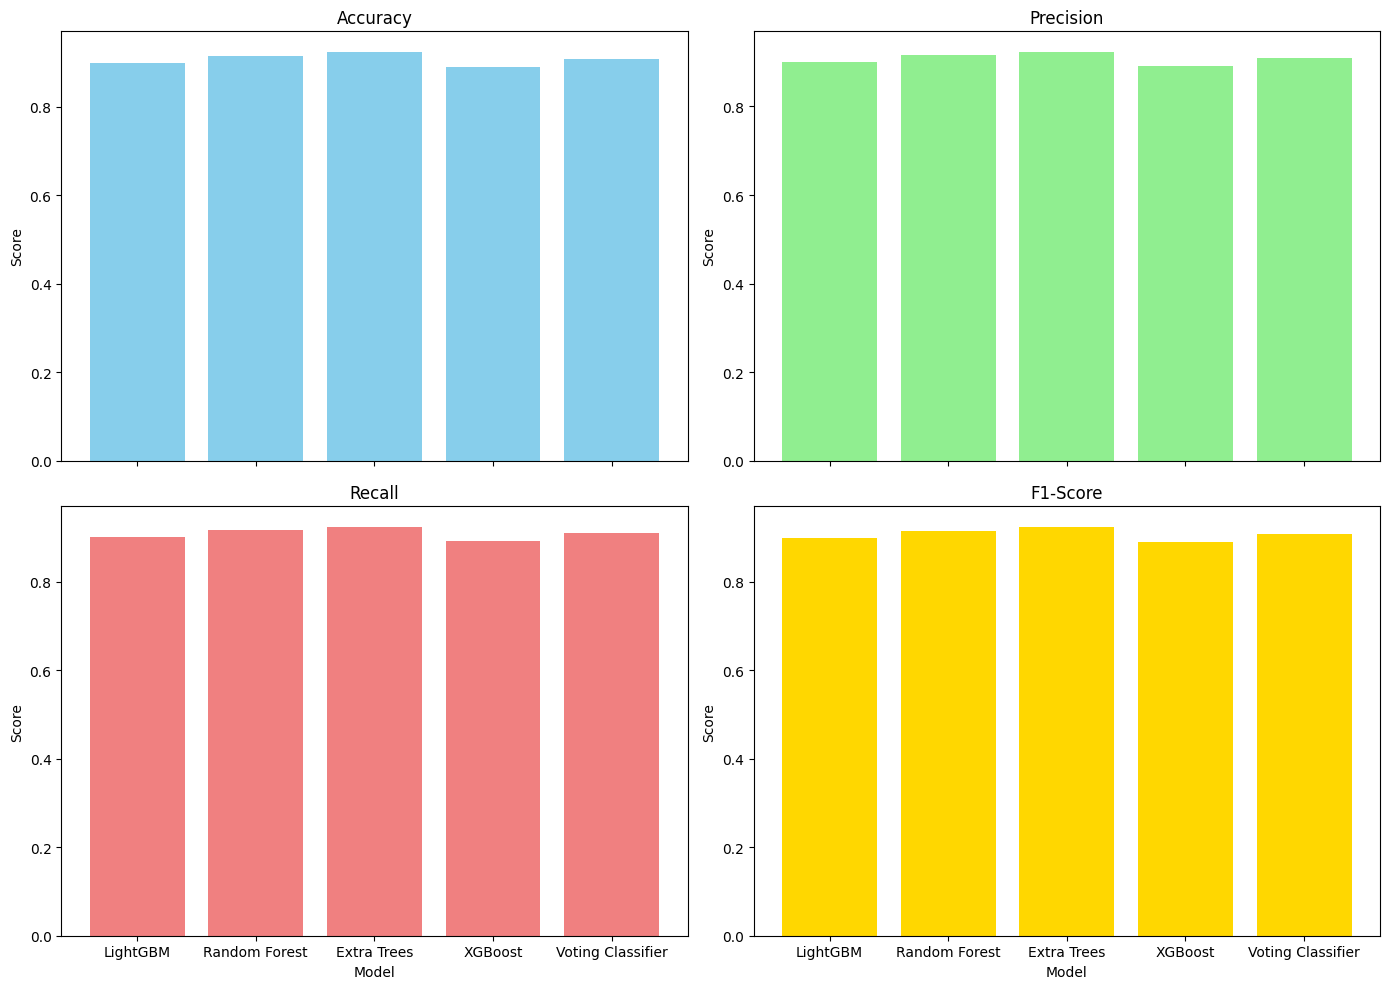

In [33]:
# Data preparation for plotting
labels = list(model_metrics.keys())
accuracy = [metrics['Accuracy'] for metrics in model_metrics.values()]
precision = [metrics['Precision'] for metrics in model_metrics.values()]
recall = [metrics['Recall'] for metrics in model_metrics.values()]
f1_score = [metrics['F1-Score'] for metrics in model_metrics.values()]

# Bar plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Plot Accuracy
axs[0, 0].bar(labels, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Score')

# Plot Precision
axs[0, 1].bar(labels, precision, color='lightgreen')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Score')

# Plot Recall
axs[1, 0].bar(labels, recall, color='lightcoral')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_xlabel('Model')

# Plot F1-Score
axs[1, 1].bar(labels, f1_score, color='gold')
axs[1, 1].set_title('F1-Score')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_xlabel('Model')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
# Re-train Random Forest model on the entire training data
best_model_rf = RandomForestClassifier(n_estimators=100, max_depth=6)
best_model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_rf = best_model_rf.predict(X_test)

# Calculate metrics
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf, recall_test_rf, f1_score_test_rf, _ = precision_recall_fscore_support(y_test, y_test_pred_rf, average='macro')

# Confusion Matrix
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Percentage of Correctly and Incorrectly Classified Instances
correctly_classified_pct_rf = accuracy_test_rf * 100
incorrectly_classified_pct_rf = (1 - accuracy_test_rf) * 100

# Calculate RMSE, RAE, and RRSE
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rae_test_rf = np.mean(np.abs(y_test - y_test_pred_rf)) / np.mean(np.abs(y_test - np.mean(y_test))) * 100
rrse_test_rf = np.sqrt(np.sum((y_test - y_test_pred_rf) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)) * 100

# Print metrics
print("Random Forest Model Metrics on Test Set:")
print(f"Accuracy: {accuracy_test_rf:.4f}")
print(f"Precision: {precision_test_rf:.4f}")
print(f"Recall: {recall_test_rf:.4f}")
print(f"F1-Score: {f1_score_test_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_test_rf}")
print(f"% Correctly Classified: {correctly_classified_pct_rf:.2f}%")
print(f"% Incorrectly Classified: {incorrectly_classified_pct_rf:.2f}%")
print(f"RMSE: {rmse_test_rf:.4f}")
print(f"RAE: {rae_test_rf:.2f}%")
print(f"RRSE: {rrse_test_rf:.2f}%")


Random Forest Model Metrics on Test Set:
Accuracy: 0.8220
Precision: 0.8331
Recall: 0.8283
F1-Score: 0.8288
Confusion Matrix:
[[26 13  0]
 [ 8 36  0]
 [ 0  0 35]]
% Correctly Classified: 82.20%
% Incorrectly Classified: 17.80%
RMSE: 0.4219
RAE: 27.87%
RRSE: 53.32%


In [35]:
# Re-train Extra Trees model on the entire training data
best_model = ExtraTreesClassifier(n_estimators=100, max_depth=6)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Calculate metrics
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Percentage of Correctly and Incorrectly Classified Instances
correctly_classified_pct = accuracy_test * 100
incorrectly_classified_pct = (1 - accuracy_test) * 100

# Calculate RMSE, RAE, and RRSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rae_test = np.mean(np.abs(y_test - y_test_pred)) / np.mean(np.abs(y_test - np.mean(y_test))) * 100
rrse_test = np.sqrt(np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)) * 100
# Print metrics
print("Extra Trees Model Metrics on Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_score_test:.4f}")
print("Confusion Matrix:")
print(conf_matrix_test)
print(f"% Correctly Classified: {correctly_classified_pct:.2f}%")
print(f"% Incorrectly Classified: {incorrectly_classified_pct:.2f}%")
print(f"RMSE: {rmse_test:.4f}")
print(f"RAE: {rae_test:.2f}%")
print(f"RRSE: {rrse_test:.2f}%")


Extra Trees Model Metrics on Test Set:
Accuracy: 0.8898
Precision: 0.8955
Recall: 0.8947
F1-Score: 0.8950
Confusion Matrix:
[[32  7  0]
 [ 6 38  0]
 [ 0  0 35]]
% Correctly Classified: 88.98%
% Incorrectly Classified: 11.02%
RMSE: 0.3319
RAE: 17.25%
RRSE: 41.95%


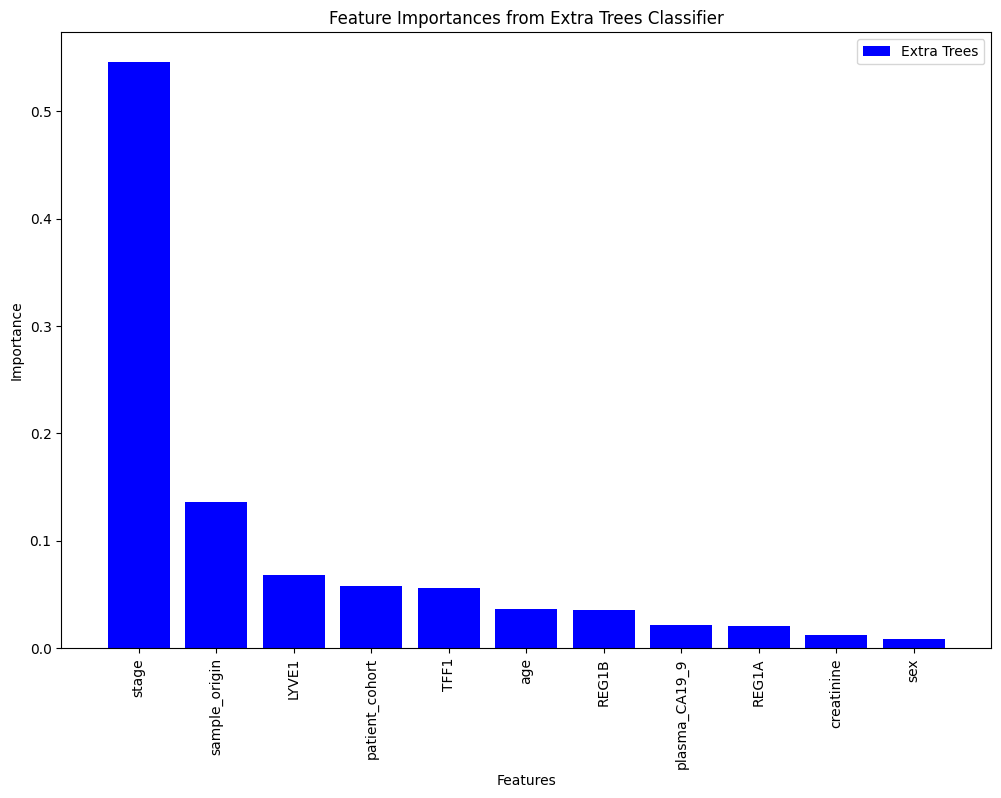

In [36]:
# Re-train Extra Trees model on the entire training data
best_model_extra_trees = ExtraTreesClassifier(n_estimators=100, max_depth=6)
best_model_extra_trees.fit(X_train, y_train)

# Feature importances for Extra Trees
importances_extra_trees = best_model_extra_trees.feature_importances_

# Plot feature importance for Extra Trees
plt.figure(figsize=(12, 8))
indices = np.argsort(importances_extra_trees)[::-1]
plt.bar(np.arange(X_train.shape[1]), importances_extra_trees[indices], align="center", color='b', label='Extra Trees')

plt.title("Feature Importances from Extra Trees Classifier")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.legend()
plt.show()
